<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
There's an introduction, which is good. It is important to write an introductory part because it gives an idea about the content of the project.
    
</div>

## INTRODUCTION

**As stated in the assignment this project originate from a telecom operator company.For budget realocation the company want me
to do some hypothesis testing on the sample data provide before making the decision.**

**After loading the require library and the data, i will proceed with some data preparation by performing any possible correction,checking for possible duplicate in the data and a fix will follow**

**One course of action also will be to perform some filtering or aggregate data point per user and perform some necessary calculation and produce some visualization of the data**

**The final action will be to perform hypotheses testing as requested by the telecom company.**






In [1]:
from scipy import stats as st
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import factorial

## Load data

In [2]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv') 

df_internet = pd.read_csv('/datasets/megaline_internet.csv')

df_messages = pd.read_csv('/datasets/megaline_messages.csv')

df_plans = pd.read_csv('/datasets/megaline_plans.csv')

df_users = pd.read_csv('/datasets/megaline_users.csv') 


## Prepare the data

In [3]:
df_calls.info()
display('')
df_internet.info()
display('')
df_messages.info()
display('')
df_plans.info()
display('')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**After a quik look at the data i did observe some missing values in the dataset name "df_users" in the last column that happen because the calling plan was being used when this database was extracted.**




## Plans

In [5]:
# Print a sample of data for plans
df_plans.sample()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**After looking at the general information and the sample of the dataset "df_plans" i can't see any missing values and the data type are as indicated in the info() method.**

**How ever i will be checking for any possible duplicate values.**

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [7]:
df_users['user_id'].nunique()

500

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [8]:
# check for possible duplicates from dataset
plans_duplicate = df_plans[df_plans.duplicated(subset=['messages_included','mb_per_month_included','minutes_included','usd_monthly_pay','usd_per_gb','usd_per_message','usd_per_minute','plan_name'])]
plans_duplicate.sum()

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
usd_monthly_pay          0.0
usd_per_gb               0.0
usd_per_message          0.0
usd_per_minute           0.0
plan_name                0.0
dtype: float64

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
There are just two rows there :) 
    
</div>

In [9]:
plans_m_v = df_plans.isnull().sum().sum
display(plans_m_v)

<bound method NDFrame._add_numeric_operations.<locals>.sum of messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64>

## Users

In [11]:
# Print a sample of data for users
df_users.sample()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
384,1384,Dominique,Good,36,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-06-09,ultimate,NaN


**After looking at the general information and the sample of the dataset "df_users" i see notice the presence of empty space in the column header that could be justified by the multiples cities to display and some missing values in the column "churn_date". The data type are as indicated in the info() method.**

**I will be checking also for any possible duplicate in the dataset.**


### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [12]:
#checking for missing values
users_m_v = df_users.isnull().sum().sum
display(users_m_v)

<bound method NDFrame._add_numeric_operations.<locals>.sum of user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64>

### Enrich Data

In [13]:
df_users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

In [14]:
users_duplicate = df_users[df_users.duplicated(subset=['user_id','first_name','last_name','age','city','reg_date','plan','churn_date'])]
                                               
users_duplicate.sum()# checking for duplicates

user_id       0.0
first_name    0.0
last_name     0.0
age           0.0
city          0.0
reg_date      0.0
plan          0.0
churn_date    0.0
dtype: float64

[Add additional factors to the data if you believe they might be useful.]

## Calls

In [16]:
# Print a sample of data for calls
df_calls.sample()


,id,user_id,call_date,duration
33030,1123_388,1123,2018-11-24,3.97


**Looking at the general information and the sample(), i do not see any discrepancy on the data type and no missing values are observed as well.**

**A duplicate check will be perform to enrich the data.**

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [17]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [18]:

calls_m_v = df_calls.isnull().sum().sum
display(calls_m_v)

<bound method NDFrame._add_numeric_operations.<locals>.sum of id           0
user_id      0
call_date    0
duration     0
dtype: int64>

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [19]:
calls_duplicate = df_calls[df_calls.duplicated(subset=['user_id','call_date','duration','id'])]
calls_duplicate.sum()# checking for duplicates                                             

id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

## Messages

In [21]:
# Print a sample of data for messages
df_messages.sample()


,id,user_id,message_date
39128,1255_110,1255,2018-09-26


**Looking at the general information and the sample(), i do not see any discrepancy on the data type and no missing values are observed as well.**

**A duplicate check will be perform to enrich the data.**

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [22]:
messages_m_v = df_messages.isnull().sum().sum
display(messages_m_v)

<bound method NDFrame._add_numeric_operations.<locals>.sum of id              0
user_id         0
message_date    0
dtype: int64>

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [23]:
messages_duplicate = df_messages[df_messages.duplicated(subset=['id','user_id','message_date'])]
display(messages_duplicate.sum())#check for possible duplicates

id              0.0
user_id         0.0
message_date    0.0
dtype: float64

## Internet

In [25]:
# Print a sample of data for the internet traffic

df_internet.sample()

,id,user_id,session_date,mb_used
60230,1272_42,1272,2018-11-30,0.0


**Looking at the general information and the sample(), i do not see any discrepancy on the data type and no missing values are observed as well.**

**A duplicate check will be perform to enrich the data.**

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [26]:
internet_m_v = df_internet.isnull().sum().sum
display(internet_m_v)

<bound method NDFrame._add_numeric_operations.<locals>.sum of id              0
user_id         0
session_date    0
mb_used         0
dtype: int64>

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [27]:
internet_duplicate = df_internet[df_internet.duplicated(subset=['id','user_id','session_date','mb_used'])]
display(internet_duplicate.sum())#check for possible duplicates

id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64

In [28]:
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [29]:
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


**Yes as you mention in your comment below we notice some zeros in df_internet in column'mb_used'that i presume could be explain by the fact that user might have opened their device, checked notifications, or performed actions that did not require internet access, leading to a recorded session with zero data usage and this could be valid for df_calls as well.**

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [30]:
# Print out the plan conditions and make sure they are clear for you
df_plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [31]:
# Here we convert session_date to datetime format
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])


In [32]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [33]:
# Here we convert message_date to datetime format
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])



In [34]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [35]:
#Here we convert call_date to datetime format
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
You can use **parse_dates**: `parse_dates=['call_date']` when reading data. Pandas will try to automatically convert this list of columns to datetime. This is a good [article](https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e) with the examples.

</div>

In [36]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [37]:
#Here we convert reg_date and churn_date to datetime format
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])


In [38]:
df_calls.columns
df_calls['duration'] = np.ceil(df_calls['duration'])
# Ceil is apply on df_call['duration']

In [39]:
# Here we aggregate df_calls
df_calls['call_period'] = df_calls['call_date'].dt.to_period('M') # Monthly period
calls_agg = df_calls.groupby(['user_id','call_period']).agg(total_duration=('duration','sum')).reset_index()
calls_agg

,user_id,call_period,total_duration
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


In [40]:
df_messages.columns

Index(['id', 'user_id', 'message_date'], dtype='object')

In [41]:
df_internet.columns

Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

In [42]:
# Here we aggregate df_internet
df_internet['session_period'] = df_internet['session_date'].dt.to_period('M') # Monthly period
internet_agg = df_internet.groupby(['user_id','session_period']).agg(total_mb_used=('mb_used','sum')).reset_index()
# Round the total_mb_used column
internet_agg['total_mb_used'] = internet_agg['total_mb_used'].round(0)
internet_agg

,user_id,session_period,total_mb_used
0,1000,2018-12,1901.0
1,1001,2018-08,6919.0
2,1001,2018-09,13315.0
3,1001,2018-10,22330.0
4,1001,2018-11,18504.0
...,...,...,...
2272,1498,2018-12,23138.0
2273,1499,2018-09,12985.0
2274,1499,2018-10,19492.0
2275,1499,2018-11,16814.0


In [43]:
# Here we merge calls_agg and internet_agg
merged_calls_internet = calls_agg.merge(internet_agg,
                                       left_on=['user_id','call_period'],
                                       right_on=['user_id','session_period'],
                                       how='outer')
merged_calls_internet['call_period'] = merged_calls_internet['call_period'].fillna(merged_calls_internet['session_period'])
merged_calls_internet['total_duration'].fillna(0, inplace=True)
merged_calls_internet

,user_id,call_period,total_duration,session_period,total_mb_used
0,1000,2018-12,124.0,2018-12,1901.0
1,1001,2018-08,182.0,2018-08,6919.0
2,1001,2018-09,315.0,2018-09,13315.0
3,1001,2018-10,393.0,2018-10,22330.0
4,1001,2018-11,426.0,2018-11,18504.0
...,...,...,...,...,...
2287,1311,2018-06,0.0,2018-06,1499.0
2288,1349,2018-10,0.0,2018-10,13094.0
2289,1349,2018-11,0.0,2018-11,17128.0
2290,1349,2018-12,0.0,2018-12,13040.0


In [44]:
merged_calls_internet['user_id'].nunique()

490

In [45]:
# Because call_period and session_period look as a duplicate of each other i will drop session_period
merged_calls_internet = merged_calls_internet.drop('session_period',axis=1)
merged_calls_internet

,user_id,call_period,total_duration,total_mb_used
0,1000,2018-12,124.0,1901.0
1,1001,2018-08,182.0,6919.0
2,1001,2018-09,315.0,13315.0
3,1001,2018-10,393.0,22330.0
4,1001,2018-11,426.0,18504.0
...,...,...,...,...
2287,1311,2018-06,0.0,1499.0
2288,1349,2018-10,0.0,13094.0
2289,1349,2018-11,0.0,17128.0
2290,1349,2018-12,0.0,13040.0


In [46]:
# Here we aggregate df_messages
df_messages['message_period'] = df_messages['message_date'].dt.to_period('M') # Monthly period
messages_agg = df_messages.groupby(['user_id','message_period']).agg(total_messages=('id','count')).reset_index()
messages_agg

,user_id,message_period,total_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [47]:
combined_agg = merged_calls_internet.merge(messages_agg,
                                          left_on=['user_id','call_period'],
                                          right_on=['user_id','message_period'],
                                          how='outer')
combined_agg.rename(columns={'call_period': 'month'}, inplace=True)
combined_agg['total_duration'].fillna(0, inplace=True)# Fill missing value or date with zeros
combined_agg['total_mb_used'].fillna(0, inplace=True)
combined_agg['total_messages'].fillna(0, inplace=True)
combined_agg['month'] = combined_agg['month'].fillna(combined_agg['message_period'])
combined_agg = combined_agg.drop('message_period',axis=1)
combined_agg

,user_id,month,total_duration,total_mb_used,total_messages
0,1000,2018-12,124.0,1901.0,11.0
1,1001,2018-08,182.0,6919.0,30.0
2,1001,2018-09,315.0,13315.0,44.0
3,1001,2018-10,393.0,22330.0,53.0
4,1001,2018-11,426.0,18504.0,36.0
...,...,...,...,...,...
2288,1349,2018-10,0.0,13094.0,76.0
2289,1349,2018-11,0.0,17128.0,72.0
2290,1349,2018-12,0.0,13040.0,61.0
2291,1361,2018-05,0.0,1520.0,2.0


In [48]:
# Filter for entries where total_duration is NaN
no_calls = combined_agg[combined_agg['total_duration'] == 0]
display("Users who sent messages but made no calls:")
#display(no_calls[['user_id', 'period', 'total_messages']])

'Users who sent messages but made no calls:'

## Observation

**The output of "combined_agg" point to some NaN for multiples "user_id" and after perfoming a rapid filter we noticed that it
is clear that some users sent messages in a specific month but have no records of calls on that specific month as well.This pattern is observed in calls, messages and internet.**


**To facilitate the analysis we fill in the NaN with zeros and drop all row with NaT**


In [49]:
#Calculate the number of calls made by each user per month
call_per_user_per_period = df_calls.groupby(['user_id','call_period']).agg(call_count=('id','count')).reset_index()
call_per_user_per_period.rename(columns={'call_period': 'month'}, inplace=True)
call_per_user_per_period

,user_id,month,call_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [50]:
#Save the result 
call_per_user_per_period.to_csv('calls_count.csv')

In [51]:
# Calculate the amount of minutes spent by each user per month.

minute_per_user_per_period = df_calls.groupby(['user_id','call_period']).agg(total_minutes=('duration','sum')).reset_index()
minute_per_user_per_period['total_minutes'] = minute_per_user_per_period['total_minutes'].round(0)
minute_per_user_per_period.rename(columns={'call_period': 'month'}, inplace=True)
minute_per_user_per_period

,user_id,month,total_minutes
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


In [52]:
#Save the result 
minute_per_user_per_period.to_csv('total_minutes.csv')

In [53]:
# Calculate the number of messages sent by each user per month.
messages_per_user_per_period = df_messages.groupby(['user_id','message_period']).agg(message_count=('id','count')).reset_index()
messages_per_user_per_period.rename(columns={'message_period': 'month'}, inplace=True)
messages_per_user_per_period

,user_id,month,message_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [54]:
#Save the result 
messages_per_user_per_period.to_csv('message_count.csv')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
In this version, you correctly replace them with zeros.    
</div>

In [55]:
combined_agg

,user_id,month,total_duration,total_mb_used,total_messages
0,1000,2018-12,124.0,1901.0,11.0
1,1001,2018-08,182.0,6919.0,30.0
2,1001,2018-09,315.0,13315.0,44.0
3,1001,2018-10,393.0,22330.0,53.0
4,1001,2018-11,426.0,18504.0,36.0
...,...,...,...,...,...
2288,1349,2018-10,0.0,13094.0,76.0
2289,1349,2018-11,0.0,17128.0,72.0
2290,1349,2018-12,0.0,13040.0,61.0
2291,1361,2018-05,0.0,1520.0,2.0


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 3 </b>
    
This result is also incorrect. 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 4</h2>
    
Now it's correct! 
</div>

In [56]:
df_users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

In [57]:
combined_agg.columns

Index(['user_id', 'month', 'total_duration', 'total_mb_used',
       'total_messages'],
      dtype='object')

In [58]:
# I merge combined_agg with df_users for future access on users data info
merged_1 = combined_agg.merge(
    df_users,
    on='user_id',  # Key to merge on
    how='left'    # Type of merge
) 
merged_1 = merged_1.drop('churn_date',axis=1)
merged_1['total_duration'].fillna(0, inplace=True)
merged_1['total_mb_used'].fillna(0, inplace=True)
merged_1['total_messages'].fillna(0, inplace=True)# Fill missing value or date with zeros# Fill missing value or date with zeros# Fill missing value or date with zeros
merged_1

,user_id,month,total_duration,total_mb_used,total_messages,first_name,last_name,age,city,reg_date,plan
0,1000,2018-12,124.0,1901.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,2018-08,182.0,6919.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1001,2018-09,315.0,13315.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
3,1001,2018-10,393.0,22330.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
4,1001,2018-11,426.0,18504.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-10,0.0,13094.0,76.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf
2289,1349,2018-11,0.0,17128.0,72.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf
2290,1349,2018-12,0.0,13040.0,61.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf
2291,1361,2018-05,0.0,1520.0,2.0,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf


In [59]:
df_plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

In [60]:
merged_1.columns

Index(['user_id', 'month', 'total_duration', 'total_mb_used', 'total_messages',
       'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan'],
      dtype='object')

In [61]:
# This merge will put all the users info in one single data frame
merged_final = merged_1.merge(df_plans,
                                          left_on=['plan'],
                                          right_on=['plan_name'],
                                          how='left')
merged_final = merged_final.drop('plan_name',axis=1)
merged_final = merged_final.drop('age',axis=1)
merged_final = merged_final.drop('reg_date',axis=1)
merged_final = merged_final.drop('first_name',axis=1)
merged_final = merged_final.drop('last_name',axis=1)
merged_final

,user_id,month,total_duration,total_mb_used,total_messages,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,2018-12,124.0,1901.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,2018-08,182.0,6919.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03
2,1001,2018-09,315.0,13315.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03
3,1001,2018-10,393.0,22330.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03
4,1001,2018-11,426.0,18504.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-10,0.0,13094.0,76.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,15360,500,20,10,0.03,0.03
2289,1349,2018-11,0.0,17128.0,72.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,15360,500,20,10,0.03,0.03
2290,1349,2018-12,0.0,13040.0,61.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,15360,500,20,10,0.03,0.03
2291,1361,2018-05,0.0,1520.0,2.0,"Birmingham-Hoover, AL MSA",surf,50,15360,500,20,10,0.03,0.03


In [62]:
def calculate_monthly_revenue(row, plans):
    # Plan details based on the user's plan
    if row['plan'] == 'surf':
        monthly_charge = 20
        included_minutes = 500
        included_messages = 50
        included_gb = 15
        excess_minute_charge = 0.03  # 3 cents
        excess_message_charge = 0.03  # 3 cents
        excess_gb_charge = 10  # $10 per GB
    elif row['plan'] == 'ultimate':
        monthly_charge = 70
        included_minutes = 3000
        included_messages = 1000
        included_gb = 30
        excess_minute_charge = 0.01  # 1 cent
        excess_message_charge = 0.01  # 1 cent
        excess_gb_charge = 7  # $7 per GB
    else:
        return 0  # Return 0 for unrecognized plans

    # Calculate excess charges
    excess_minutes = max(0, row['total_duration'] - included_minutes) * excess_minute_charge
    excess_messages = max(0, row['total_messages'] - included_messages) * excess_message_charge
    excess_gb = max(0, (row['total_mb_used'] / 1024 - included_gb)) * excess_gb_charge

    # Calculate total revenue
    revenue = monthly_charge + excess_minutes + excess_messages + excess_gb
    return revenue

# Now apply the function to the DataFrame
merged_final['monthly_revenue'] = merged_final.apply(lambda row: calculate_monthly_revenue(row, df_plans), axis=1)

In [63]:
display(merged_final[['user_id', 'month', 'monthly_revenue', 'plan']])

,user_id,month,monthly_revenue,plan
0,1000,2018-12,70.000000,ultimate
1,1001,2018-08,20.000000,surf
2,1001,2018-09,20.000000,surf
3,1001,2018-10,88.156406,surf
4,1001,2018-11,50.703125,surf
...,...,...,...,...
2288,1349,2018-10,20.780000,surf
2289,1349,2018-11,37.925625,surf
2290,1349,2018-12,20.330000,surf
2291,1361,2018-05,20.000000,surf


In [64]:
merged_final.columns# this is my final data frame with the contain of the other info that i will need futher 

Index(['user_id', 'month', 'total_duration', 'total_mb_used', 'total_messages',
       'city', 'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'monthly_revenue'],
      dtype='object')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 4</h2>
    
Good! In the code below, I'll show you how to create the same function without using constants:
</div>

In [65]:
# Reviewer's code 4

df = merged_final.copy() # df is just a shorter name.

def func(df):
    
    # just to make it more convenient and to be able to get data with loc + plan_name, I set plan_name as index:
    plans = df_plans.set_index('plan_name') 
    
    revenue = plans.loc[df.plan]['usd_monthly_pay']
    
    revenue += (max(0, (df['total_duration'] - plans.loc[df.plan]['minutes_included']) * plans.loc[df.plan]['usd_per_minute'])
    + max(0, (df['total_messages'] - plans.loc[df.plan]['messages_included']) * plans.loc[df.plan]['usd_per_message'])
    + max(0, (np.ceil((df['total_mb_used'] - plans.loc[df.plan]['mb_per_month_included'])/1024)) * plans.loc[df.plan]['usd_per_gb']))
    
    return revenue
    
df.apply(func, axis=1)  # Revenue column.

0       70.00
1       20.00
2       20.00
3       90.09
4       60.00
        ...  
2288    20.78
2289    40.66
2290    20.33
2291    20.00
2292    70.00
Length: 2293, dtype: float64

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [66]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# We group by plan name and month, then we calculate the average duration
average_duration = (merged_final.groupby(['plan','month'],as_index=False)
                .agg({'total_duration': 'mean'}))
#average_duration


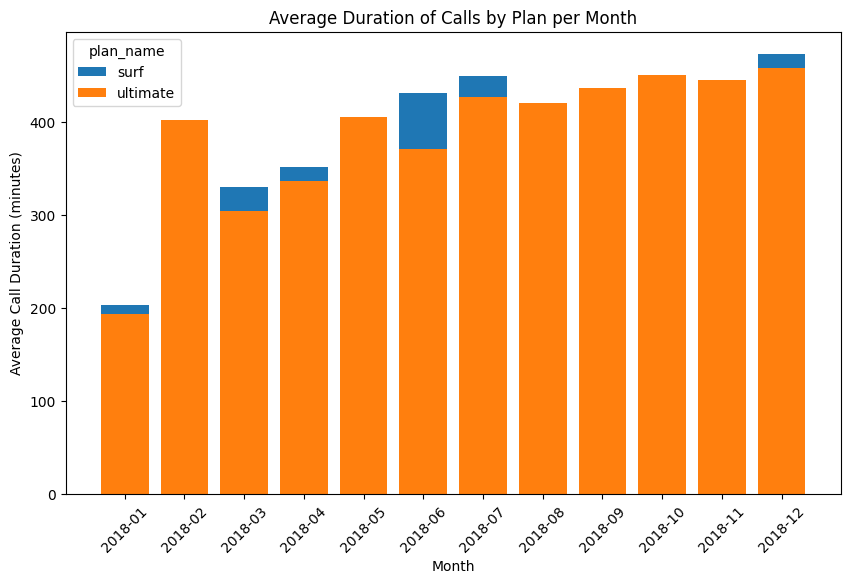

In [67]:
average_duration['month']=average_duration['month'].astype(str)
plans = average_duration['plan'].unique()
#months = average_duration['period'].unique()
#bar_width = 0.35
#x = np.arange(len(months))
plt.figure(figsize=(10,6))
# This loop will create bar for each plan
for plan in plans:
    data = average_duration[average_duration['plan']== plan]
    plt.bar(data['month'],data['total_duration'],label=plan)
    #plan_index = np.where(plans==plan)[0][0]
    #plt.bar(x + plan_index * bar_width, data['total_duration'].values, width=bar_width,label=plan)
    

plt.title('Average Duration of Calls by Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.xticks(rotation=45)
plt.legend(title='plan_name')
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Nice chart! It's great that you add a title with axes labels. 
    
</div>

**Looking at the plot we noticed in a users behavoir a strong usage of the 'ultimate plan' with the lowest call duration arround 400 minutes and a peak call duration just a bit below 600 minutes compare to the 'surf plan' for the two month display out of 12 months with a peak call duration just under 500 minutes.**
**Why is utimate plan so attractive?**

In [68]:
mean_minutes = merged_final['total_duration'].mean()
median_minutes = merged_final['total_duration'].median()
print(f"Mean: {mean_minutes}, Median: {median_minutes}")

Mean: 429.2834714348016, Median: 425.0


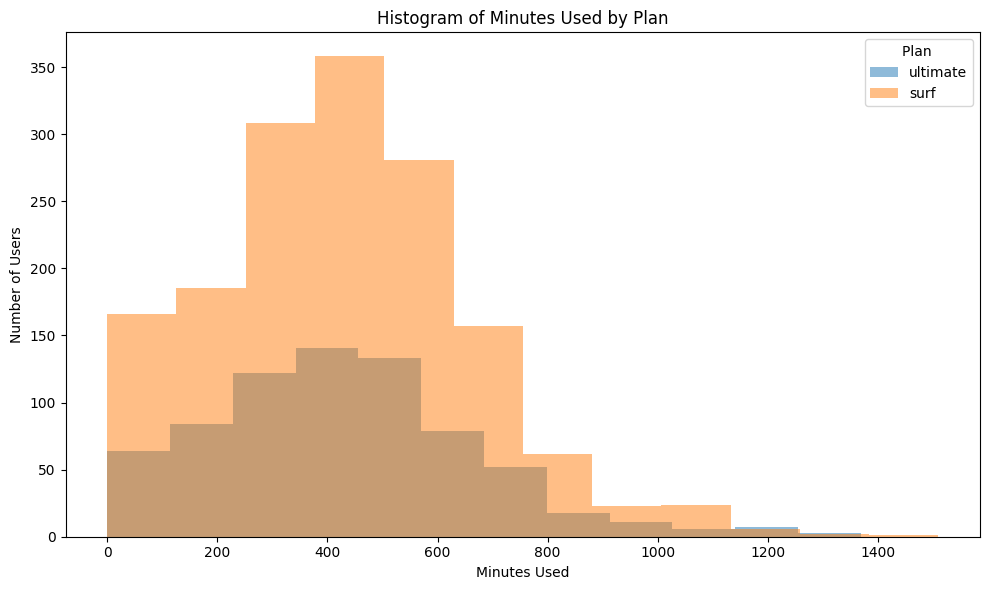

In [69]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# Plotting histogram of total_duration by plan_name
plt.figure(figsize=(10, 6))

# Create histogram for each plan
for plan in merged_final['plan'].unique():
    plt.hist(
        merged_final[merged_final['plan'] == plan]['total_duration'],
        bins=12,  
        alpha=0.5,  
        label=plan
    )

plt.title('Histogram of Minutes Used by Plan')
plt.xlabel('Minutes Used')
plt.ylabel('Number of Users')
plt.legend(title='Plan ')
plt.tight_layout()
plt.show()



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 4</h2>
    
By the way, our dataframe allows us to plot 2 histograms on one graph in grouping:

</div>


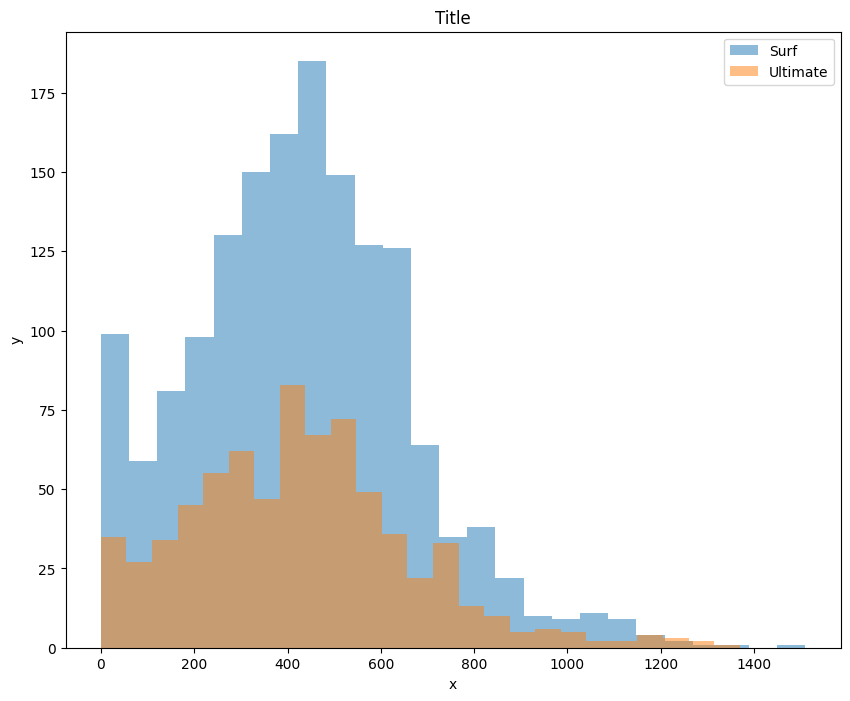

In [70]:
# Reviewer's code 4


merged_final.groupby('plan')['total_duration'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Title')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
The code for displaying histograms is correct. 
</div>

**Looking at the histogram we see that this is not a normal distribution and the data is pointing at a rigth skew shape.We also noticed that most of our users in surf plan  are using few minutes and fewer users are using more minutes.The histogram also indicate that on the ultimate plan fewer user use most of the minutes with a user peak near 600 minutes used.**
**The graph indicates that the data points are spread out over a wider range of values.**

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [71]:
calls_agg.columns

Index(['user_id', 'call_period', 'total_duration'], dtype='object')

In [72]:
#Calculate the mean, std and the variance of the monthly call duration
stats_calls_1 = merged_final.groupby('plan')['total_duration'].agg(['mean', 'var', 'std']).reset_index()
stats_calls_1



,plan,mean,var,std
0,surf,428.749523,54968.279461,234.453150
1,ultimate,430.450000,57844.464812,240.508762


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>
    
Correct! 

</div>

**Variance measures how much the values in a dataset deviate from the mean. A higher variance indicates that the data points are spread out over a wider range of values, while a lower variance indicates that they are closer to the mean.**
**A variance of this size suggests that there is significant variability in the monthly call durations among users.**

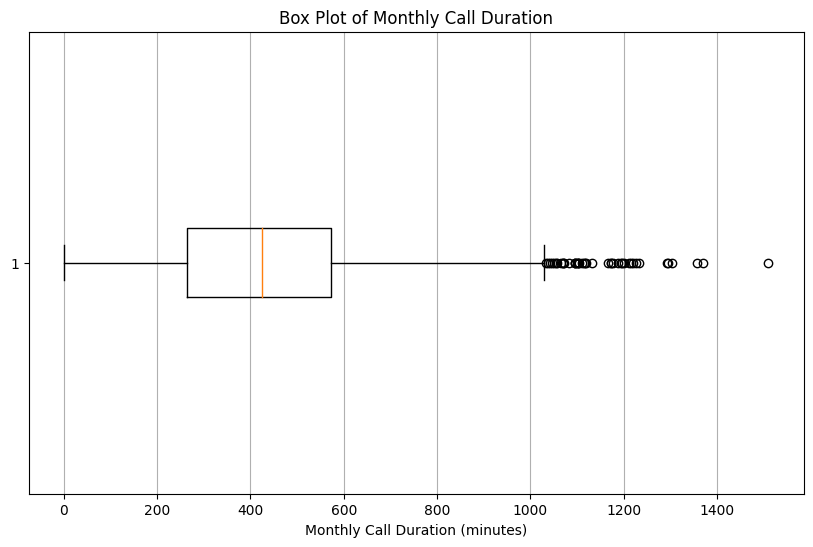

In [73]:
#Plot a boxplot to visualize the distribution of the monthly call duration
# (monthly call duration)
plt.figure(figsize=(10, 6))
plt.boxplot(merged_final['total_duration'], vert=False)
plt.title('Box Plot of Monthly Call Duration')
plt.xlabel('Monthly Call Duration (minutes)')
plt.grid(axis='x')
plt.show()


**The box plot indicate a median at the value closed to 400.**
**Users’ call patterns are not consistent month-to-month. Some users may make many calls in certain months, while in other months, their usage may drop significantly.**
 
**For a telecom provider, understanding this variability can be crucial for forecasting demand, managing network capacity, and creating targeted marketing strategies.**
 
**We also notice a fluctuating amount of outlier at the upper bound**
 

### Messages

In [74]:
# Compare the number of messages users of each plan tend to send each month
# Group by plan_name and period, then sum messages_sent
message_comparison = (merged_final.groupby(['plan', 'month'], as_index=False)
                      .agg({'total_messages': 'sum'}))


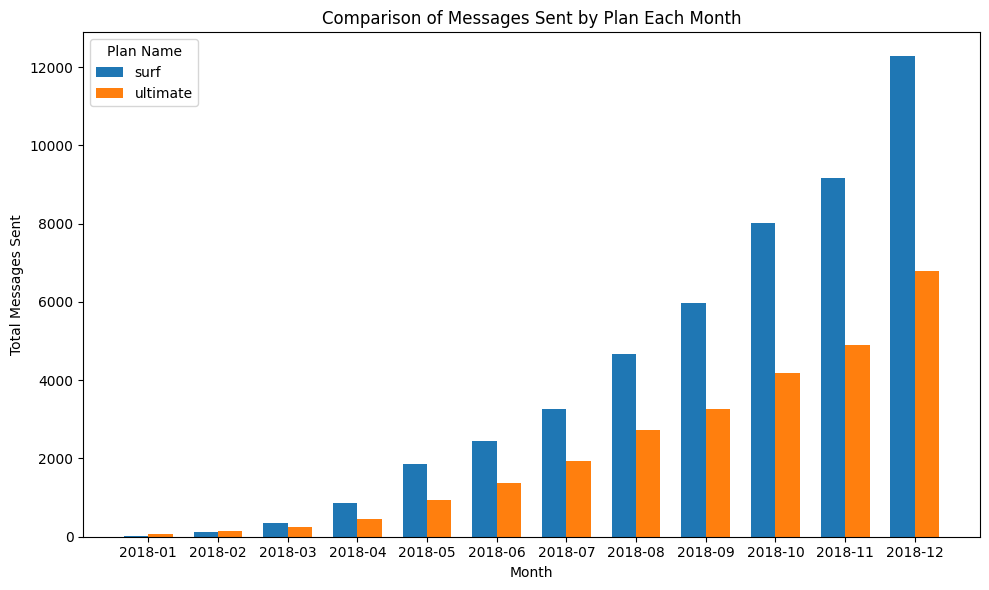

In [75]:
# Plotting the comparison
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Create unique period labels for x-axis
periods = message_comparison['month'].unique()

# Create a bar plot for each plan
for i, plan in enumerate(message_comparison['plan'].unique()):#This is used simply to get the index for each plan without complicating the calculations.
    plan_data = message_comparison[message_comparison['plan'] == plan]
    x_positions = range(len(plan_data))  # x positions for the current plan
    plt.bar([x + i * bar_width for x in x_positions],
             plan_data['total_messages'],
             width=bar_width,
             label=plan)

# Adding titles and labels
plt.title('Comparison of Messages Sent by Plan Each Month')
plt.xlabel('Month')
plt.ylabel('Total Messages Sent')
plt.xticks(ticks=[x + bar_width / 2 for x in range(len(periods))], labels=periods)
plt.legend(title='Plan Name')
plt.tight_layout()
plt.show()

**The comparaison of messages sent plot indicate that the users did not used the surf plan for the month off February and March however we noticed a start increase the other month with a peak at the month December**
**We also notice that the ultimate plan  show some fluctuage on the usage and reach it peak in the month of March.**
**Over all the surf plan indicate a stronger usage compare to the ultimate plan.**

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

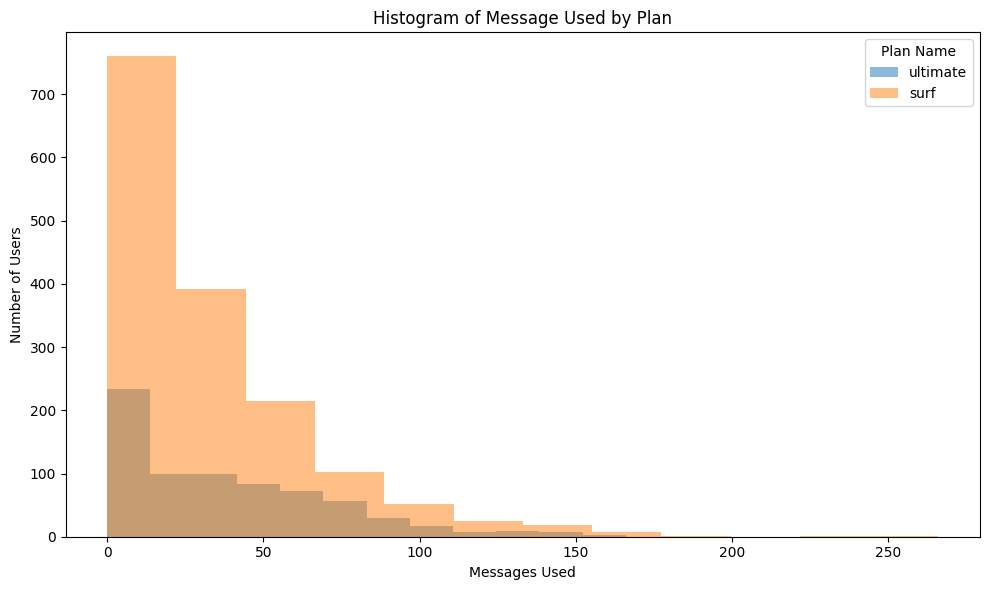

In [76]:
# Plotting histogram of total_messages by plan_name
plt.figure(figsize=(10, 6))

# Create histogram for each plan
for plan in merged_final['plan'].unique():
    plt.hist(
        merged_final[merged_final['plan'] == plan]['total_messages'],
        bins=12,  
        alpha=0.5,  
        label=plan
    )

plt.title('Histogram of Message Used by Plan')
plt.xlabel('Messages Used')
plt.ylabel('Number of Users')
plt.legend(title='Plan Name')
plt.tight_layout()
plt.show()

Looking at the histogram we see that this is not a normal distribution and the data is pointing at a left skew shape.We also noticed that most of our users in surf plan are sending few messages and fewer users are sending more messages.The histogram also indicate that on the ultimate plan fewer user send most of the messages.The graph indicates that the data points are spread out over a wider range of values.

In [77]:
#Calculate the mean, std and the variance of the monthly total messages
stats_messages = merged_final.groupby('plan')['total_messages'].agg(['mean', 'var', 'std']).reset_index()
stats_messages

,plan,mean,var,std
0,surf,31.159568,1126.724522,33.566717
1,ultimate,37.551389,1208.756744,34.767179


### Internet

In [78]:
#Compare the amount of internet traffic consumed by users per plan

traffic_comparison = (merged_final.groupby('plan', as_index=False)
                      .agg({'total_mb_used': 'sum'}))


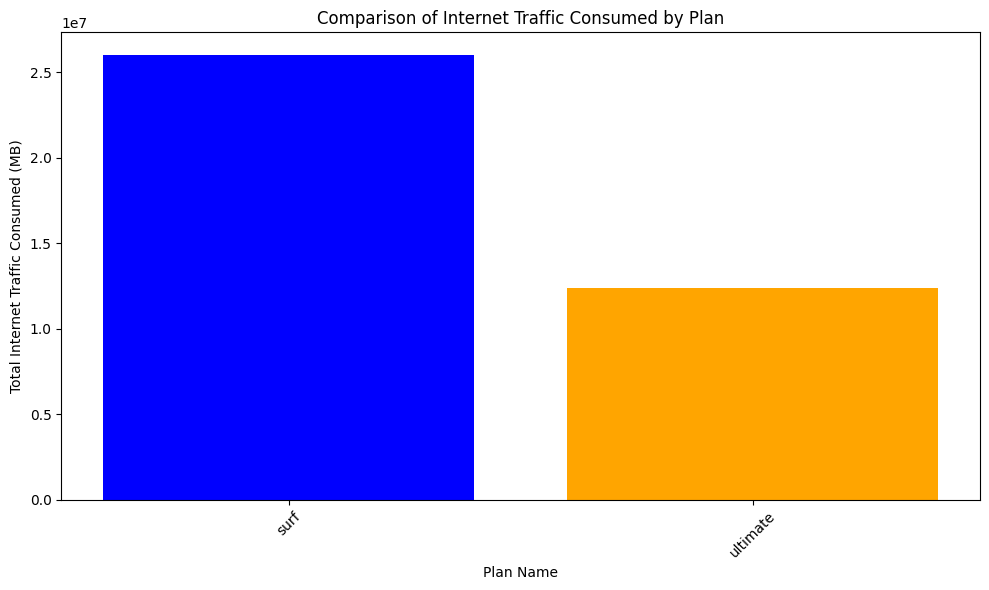

In [79]:
# Plotting the comparison
plt.figure(figsize=(10, 6))

# Create a bar plot for internet traffic consumption
plt.bar(traffic_comparison['plan'], traffic_comparison['total_mb_used'], color=['blue', 'orange'])

# Adding titles and labels
plt.title('Comparison of Internet Traffic Consumed by Plan')
plt.xlabel('Plan Name')
plt.ylabel('Total Internet Traffic Consumed (MB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**As the plot indicate we see that the surf plan usage traffic is almost double the ultimate plan traffic.**

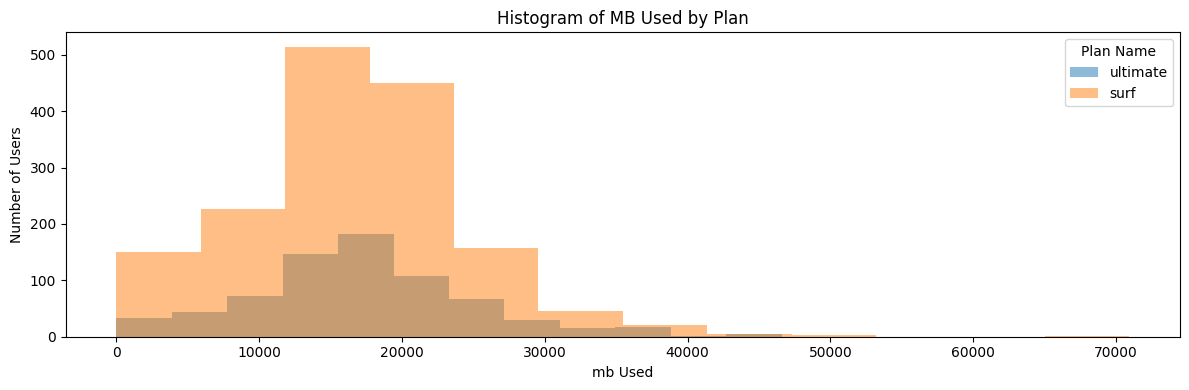

In [80]:
# Plotting histogram of total_mb_used by plan_name
plt.figure(figsize=(12, 4))

# Create histogram for each plan
for plan in merged_final['plan'].unique():
    plt.hist(
        merged_final[merged_final['plan'] == plan]['total_mb_used'],
        bins=12,  
        alpha=0.5,  
        label=plan
    )

plt.title('Histogram of MB Used by Plan')
plt.xlabel('mb Used')
plt.ylabel('Number of Users')
plt.legend(title='Plan Name')
plt.tight_layout()
plt.show()

Looking at the histogram we see that this is not a normal distribution and the data is pointing at a left skew shape.We also noticed that most of our users in surf plan usage of mb peak 17kmb and fewer users are used more mb.The histogram also indicate that on the ultimate plan fewer user used most of the mb and the mb usage peak arround 18kmb with just under 150 users.The graph indicates that the data points are spread out over a wider range of values.

In [81]:
#Calculate the mean, std and the variance of the monthly total mb used
stats_internet = merged_final.groupby('plan')['total_mb_used'].agg(['mean', 'var', 'std']).reset_index()
stats_internet

,plan,mean,var,std
0,surf,16558.286078,6.421663e+07,8013.527760
1,ultimate,17214.706944,6.165274e+07,7851.926134


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>
    
Good. 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2  </h2>
    
Well done! </div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

    

    
</div>

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

## 2.6.1 revenue calls

In [82]:
#compare the revenue of calls per plan per each distinct month
# Function to calculate revenue from calls only
def calculate_call_revenue(row):
    if row['plan'] == 'surf':
        included_minutes = 500
        excess_minute_charge = 0.03  # 3 cents
    elif row['plan'] == 'ultimate':
        included_minutes = 3000
        excess_minute_charge = 0.01  # 1 cent
    else:
        return 0  # Unrecognized plan

    # Calculate excess charges for calls only
    excess_minutes = max(0, row['total_duration'] - included_minutes)
    excess_minutes_revenue = excess_minutes * excess_minute_charge
    return excess_minutes_revenue

# Apply the function to calculate call revenue
merged_final['call_revenue'] = merged_final.apply(calculate_call_revenue, axis=1)

# Group by plan and month, summing the call revenue
monthly_call_revenue = merged_final.groupby(['plan', 'month'])['call_revenue'].sum().reset_index()

# Rename the columns for clarity
monthly_call_revenue.rename(columns={'call_revenue': 'total_call_revenue'}, inplace=True)

#(monthly_call_revenue)

In [83]:
def func(df):
    
    # just to make it more convenient and to be able to get data with loc + plan_name, I set plan_name as index:
    plans = df_plans.set_index('plan_name') 
    
    revenue = plans.loc[df.plan]['usd_monthly_pay']
    
    revenue += (max(0, (df['total_duration'] - plans.loc[df.plan]['minutes_included']) * plans.loc[df.plan]['usd_per_minute'])
    + max(0, (df['total_messages'] - plans.loc[df.plan]['messages_included']) * plans.loc[df.plan]['usd_per_message'])
    + max(0, (np.ceil((df['total_mb_used'] - plans.loc[df.plan]['mb_per_month_included'])/1024)) * plans.loc[df.plan]['usd_per_gb']))
    
    return revenue
    
df.apply(func, axis=1)

0       70.00
1       20.00
2       20.00
3       90.09
4       60.00
        ...  
2288    20.78
2289    40.66
2290    20.33
2291    20.00
2292    70.00
Length: 2293, dtype: float64

In [84]:
# display revenue call for each user
# Group by plan and month, summing the call revenue
#This code already was written in the fuction definition i am dispaying to anwser the question about calculation of call revenue
monthly_call_revenue

,plan,month,total_call_revenue
0,surf,2018-01,0.00
1,surf,2018-02,9.33
2,surf,2018-03,16.26
3,surf,2018-04,52.92
4,surf,2018-05,127.71
5,surf,2018-06,155.31
6,surf,2018-07,265.98
7,surf,2018-08,267.66
8,surf,2018-09,278.58
9,surf,2018-10,425.25


In [86]:
#Calculate the mean, std and the variance of the monthly revenue of calls
#We group by 'plan','month' and calculate mean, std, and variance
summary_stats_per_plan = monthly_call_revenue.groupby(['plan'])['total_call_revenue'].agg(['mean', 'std', 'var']).reset_index()
# We rename columns for clarity
summary_stats_per_plan.columns = ['Plan', 'Mean Call Revenue', 'Standard Deviation', 'Variance']
summary_stats_per_plan

,Plan,Mean Call Revenue,Standard Deviation,Variance
0,surf,241.6875,240.864038,58015.484857
1,ultimate,0.0000,0.000000,0.000000


**ultimate: The standard deviation is 0.00, indicating no variability in the monthly revenue for this plan. All users on the ultimate plan generate exactly $0.00 in revenue, which is why the standard deviation is zero.**
**The variance is 0.00, further confirming that there is no spread in revenue for users on the ultimate plan. Every user pays the same amount, leading to zero variance.**
**However it important as you mention to indicate that this monthly revenue computation included only the included_minutes and the excess_minutes_charge when the user exceed the set amound and also to remember that the monthly fee(charge that apply regardless) was not included as well on the monthly revenue.**

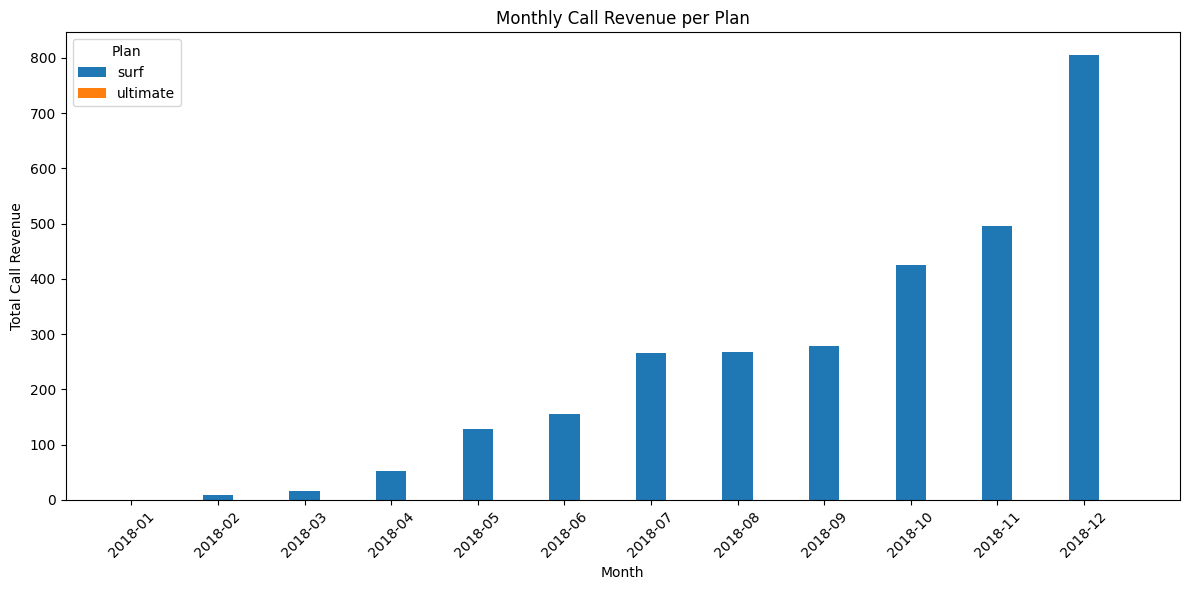

In [87]:
#We group by 'month' and 'plan', summing the call revenue
grouped_data = monthly_call_revenue.groupby(['month', 'plan'])['total_call_revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
#We create a bar plot with grouped bars for each plan
bar_width = 0.35
months = grouped_data['month'].astype(str).unique()
x = range(len(months))
#We create bars for each plan
for plan in grouped_data['plan'].unique():
    subset = grouped_data[grouped_data['plan'] == plan]
    plt.bar([j + (0 if plan == 'surf' else bar_width) for j in x], 
             subset['total_call_revenue'], 
             width=bar_width, 
             label=plan)
plt.title('Monthly Call Revenue per Plan')
plt.xlabel('Month')
plt.ylabel('Total Call Revenue')# On the monthly basic
plt.xticks(x, months, rotation=45)
plt.legend(title='Plan')
plt.tight_layout()  # Adjust layout for better display
plt.show()    


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 4</b>
    
This is not monthly revenue anymore. </div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment 5 </h2>
    

Good. 
</div>

**The visualization of the plot indicate a gradual increase in revenue per month for surf plan however the ultimate plan showing no indication as expected from the monthly revenue calculation above.**
**The surf plan reach it peak during the month of December.**
**No revenue or very small revenue for the surf plan was recorded during the first month of the year.**

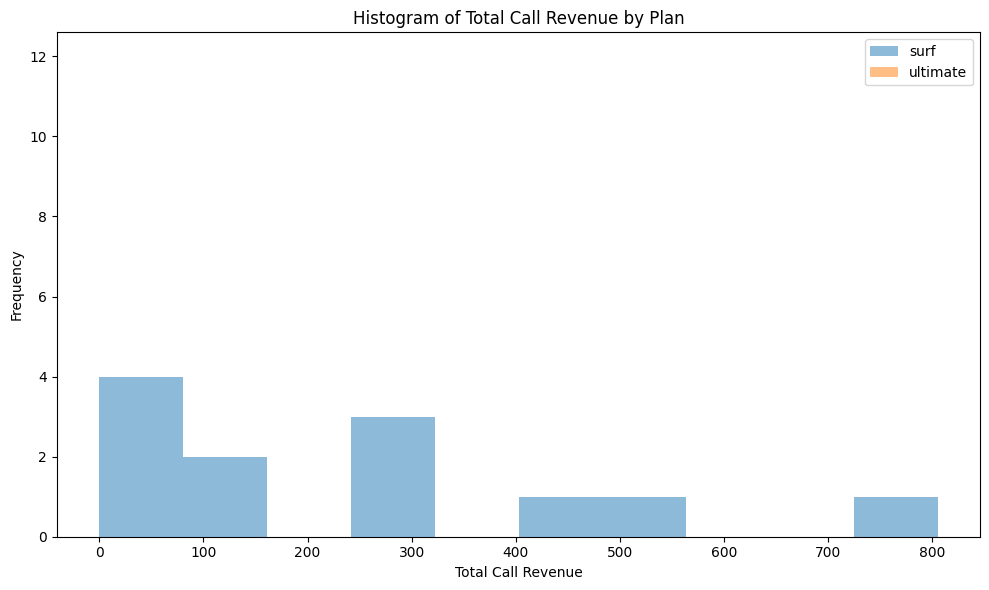

In [88]:
# Hist for monthly total call revenue
plt.figure(figsize=(10, 6))

for plan in monthly_call_revenue['plan'].unique():
    subset = monthly_call_revenue[monthly_call_revenue['plan'] == plan]
    plt.hist(subset['total_call_revenue'], bins=10, alpha=0.5, label=plan)

plt.xlabel('Total Call Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Total Call Revenue by Plan')
plt.legend()
plt.tight_layout()
plt.show()

**The frequency for each bin indicates how many data points fall into that particular range.**
**This histogram also indicate that the surf plan have a higher number of observations within the revenue range of up to (10 to 80) that also could indicate that most user produced revenue in that range.From revenue range of 80 to 180 we noticed a decrease in the number of observation by almost half compare to the previous revenue range.From revenue range of 180 to 245 about there is no observation that could imply the no user on that revenue range**
**From revenue range of 245 to about 320 we also notice an increse of the number of observation in that range.**
**We also noticed that a lower number of users are at the lower end of revenue range.**
**As we expected the hist give no indication or somthing close to a single point bin on the ultimate plan.** 

## 2.6.2 revenue messages

In [89]:
#compare the revenue of messages per plan per each distinct month
# Function to calculate revenue from messages only
def calculate_message_revenue(row):
    if row['plan'] == 'surf':
        included_messages = 50
        excess_message_charge = 0.03  # 3 cents
    elif row['plan'] == 'ultimate':
        included_messages = 1000
        excess_message_charge = 0.01  # 1 cent
    else:
        return 0  # Unrecognized plan

    # Calculate excess charges for calls only
    excess_messages = max(0, row['total_messages'] - included_messages)
    excess_message_revenue = excess_messages * excess_message_charge
    return excess_message_revenue

# Apply the function to calculate call revenue
merged_final['message_revenue'] = merged_final.apply(calculate_message_revenue, axis=1)

# Group by plan and month, summing the call revenue
monthly_message_revenue = merged_final.groupby(['plan', 'month'])['message_revenue'].sum().reset_index()

# Rename the columns for clarity
monthly_message_revenue.rename(columns={'message_revenue': 'total_message_revenue'}, inplace=True)

#(monthly_message_revenue)

In [90]:
# Calculate revenue for each user
(monthly_message_revenue)

,plan,month,total_message_revenue
0,surf,2018-01,0.00
1,surf,2018-02,0.24
2,surf,2018-03,0.39
3,surf,2018-04,2.61
4,surf,2018-05,9.66
5,surf,2018-06,14.49
6,surf,2018-07,17.58
7,surf,2018-08,29.19
8,surf,2018-09,36.09
9,surf,2018-10,59.58


In [91]:
#Calculate the mean, std and the variance of the monthly revenue of messages
#We group by 'plan','month' and calculate mean, std, and variance
summary1_stats_per_plan = monthly_message_revenue.groupby(['plan'])['total_message_revenue'].agg(['mean', 'std', 'var']).reset_index()
# We rename columns for clarity
summary1_stats_per_plan.columns = ['Plan', 'Mean Message Revenue', 'Standard Deviation', 'Variance']
summary1_stats_per_plan

,Plan,Mean Message Revenue,Standard Deviation,Variance
0,surf,27.5775,31.692433,1004.41033
1,ultimate,0.0000,0.000000,0.00000


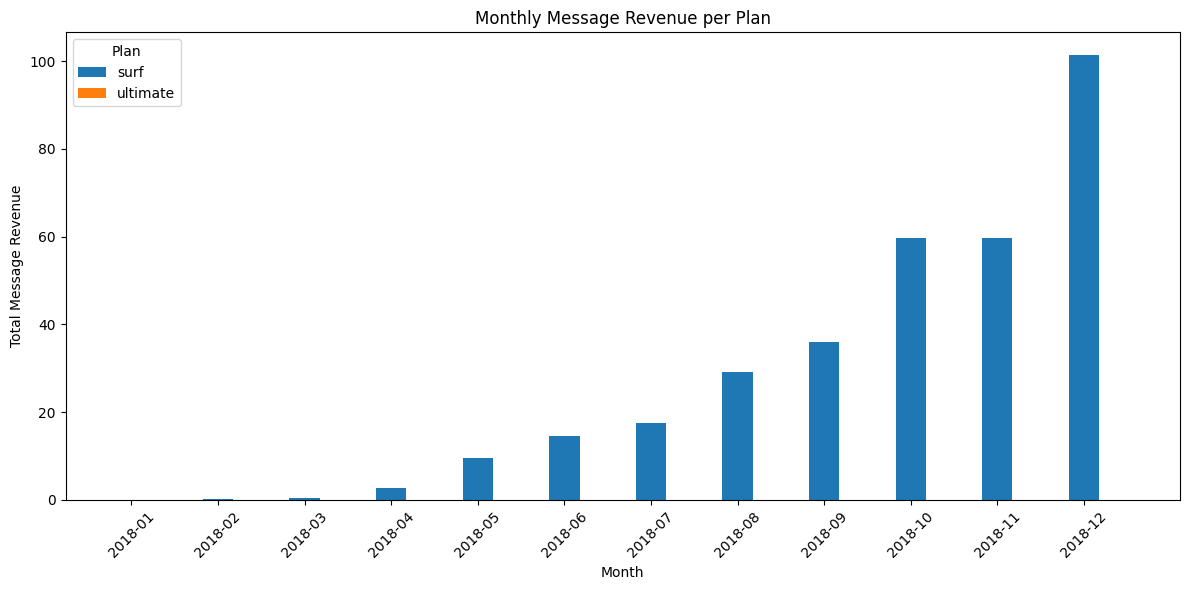

In [92]:
#We group by 'month' and 'plan', summing the message revenue
grouped_message_data = monthly_message_revenue.groupby(['month', 'plan'])['total_message_revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
#We create a bar plot with grouped bars for each plan
bar_width = 0.35
months = grouped_message_data['month'].astype(str).unique()
x = range(len(months))
#We create bars for each plan
for plan in grouped_message_data['plan'].unique():
    subset = grouped_message_data[grouped_message_data['plan'] == plan]
    plt.bar([j + (0 if plan == 'surf' else bar_width) for j in x], 
             subset['total_message_revenue'], 
             width=bar_width, 
             label=plan)
plt.title('Monthly Message Revenue per Plan')
plt.xlabel('Month')
plt.ylabel('Total Message Revenue')# On the monthly basic
plt.xticks(x, months, rotation=45)
plt.legend(title='Plan')
plt.tight_layout()  # Adjust layout for better display
plt.show()    

**The visualization of the total monthly mesage revenue plot indicate a gradual increase in revenue per month for surf plan.**
**The surf plan reach his peak during the month of December.**
**No revenue or very small revenue for surf plan was recorded during the first three month of the year.**
**As expected there is no revenue indication for the ultimate plan and this reflect the revenue calculation done above**

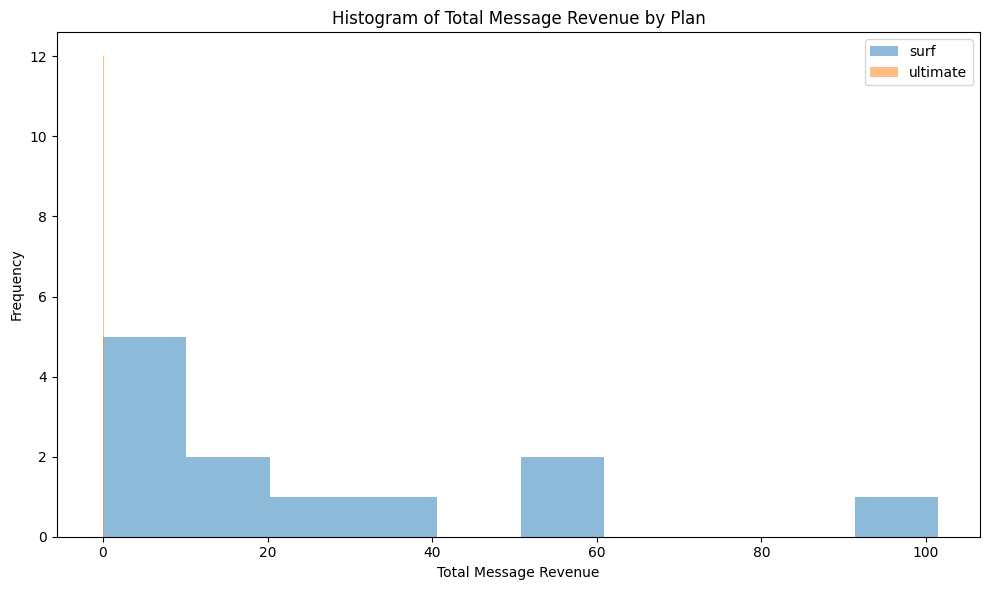

In [93]:
#Hist for message revenue
plt.figure(figsize=(10, 6))

for plan in monthly_message_revenue['plan'].unique():
    subset = monthly_message_revenue[monthly_message_revenue['plan'] == plan]
    plt.hist(subset['total_message_revenue'], bins=10, alpha=0.5, label=plan)

plt.xlabel('Total Message Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Total Message Revenue by Plan')
plt.legend()
plt.tight_layout()
plt.show()

**The frequency for each bin indicates how many data points fall into that particular range.**
**This histogram also indicate that the surf plan have a higher number of observations within the revenue range up to 10 and this indicate that high number of users in that revunue range and that is follow by a gradual decrease of the number of observations up to the range revenue 40**
**From range revenue 40 to 50 we notice no observation which could imply that no user activity in that revenue range. That is follow by sudden moderate jump in the number of observation from revunue range of 50 to 60. This histogram also point that as the revenue range increase the concentration of user in those high revenue range decrease.**
**Facinating that the ultimate plan indicate almost a single point bins which could also indicate that the bin's range is effectively zero,a limited data variations, the size of the data sample and also inadequate binnings.** 

## 2.6.2 revenue internet

In [94]:
def calculate_internet_revenue(row):
    if row['plan'] == 'surf':
        included_gb = 5
        excess_gb_charge = 10  # 3 cents
    elif row['plan'] == 'ultimate':
        included_gb = 30
        excess_gb_charge = 7  # 1 cent
    else:
        return 0  # Unrecognized plan

    # Calculate excess charges for internet
    excess_data = max(0, row['total_mb_used']/1024 - included_gb)
    excess_data_revenue = excess_data * excess_gb_charge
    return excess_data_revenue

# Apply the function to calculate internet revenue
merged_final['internet_revenue'] = merged_final.apply(calculate_internet_revenue, axis=1)

# Group by plan and month, summing the internet revenue
monthly_internet_revenue = merged_final.groupby(['plan', 'month'])['internet_revenue'].sum().reset_index()

# Rename the columns for clarity
monthly_internet_revenue.rename(columns={'internet_revenue': 'total_internet_revenue'}, inplace=True)

In [95]:
# Calculate internet revenue for each user
monthly_internet_revenue

,plan,month,total_internet_revenue
0,surf,2018-01,27.099609
1,surf,2018-02,664.531250
2,surf,2018-03,2012.373047
3,surf,2018-04,3662.812500
4,surf,2018-05,6939.238281
5,surf,2018-06,9898.203125
6,surf,2018-07,14133.525391
7,surf,2018-08,18941.054688
8,surf,2018-09,22040.566406
9,surf,2018-10,28669.687500


In [96]:
#Calculate the mean, std and the variance of the monthly revenue of internet
#We group by 'plan','month' and calculate mean, std, and variance
summary2_stats_per_plan = monthly_internet_revenue.groupby(['plan'])['total_internet_revenue'].agg(['mean', 'std', 'var']).reset_index()
# We rename columns for clarity
summary2_stats_per_plan.columns = ['Plan', 'Mean Internet Revenue', 'Standard Deviation', 'Variance']
summary2_stats_per_plan

,Plan,Mean Internet Revenue,Standard Deviation,Variance
0,surf,14955.340169,13532.872926,1.831386e+08
1,ultimate,126.966146,131.804322,1.737238e+04


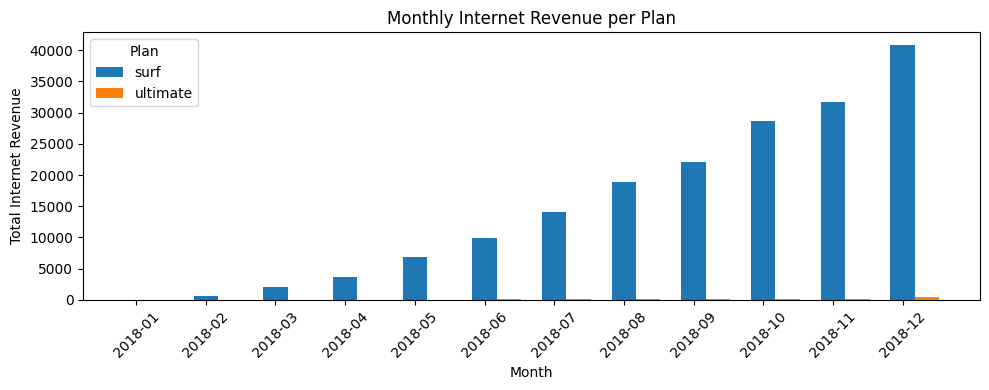

In [97]:
grouped_internet_data = monthly_internet_revenue.groupby(['month', 'plan'])['total_internet_revenue'].sum().reset_index()
plt.figure(figsize=(10, 4))
#We create a bar plot with grouped bars for each plan
bar_width = 0.35
months = grouped_internet_data['month'].astype(str).unique()
x = range(len(months))
#We create bars for each plan
for plan in grouped_internet_data['plan'].unique():
    subset = grouped_internet_data[grouped_internet_data['plan'] == plan]
    plt.bar([j + (0 if plan == 'surf' else bar_width) for j in x], 
             subset['total_internet_revenue'], 
             width=bar_width, 
             label=plan)
plt.title('Monthly Internet Revenue per Plan')
plt.xlabel('Month')
plt.ylabel('Total Internet Revenue')# On the monthly basic
plt.xticks(x, months, rotation=45)
plt.legend(title='Plan')
plt.tight_layout()  # Adjust layout for better display
plt.show()    

**The comparaison of the internet revenue plot indicate that the users did not used both plan for the month off Jan and Feb. however we noticed a start increase the other month with a peak at the month December.**
**We also notice that the ultimate plan  show some fluctuage on the usage and reach it peak in the month of Dec.**
**Over all the surf plan indicate a stronger usage compare to the ultimate plan.**


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Good job here!     
</div>

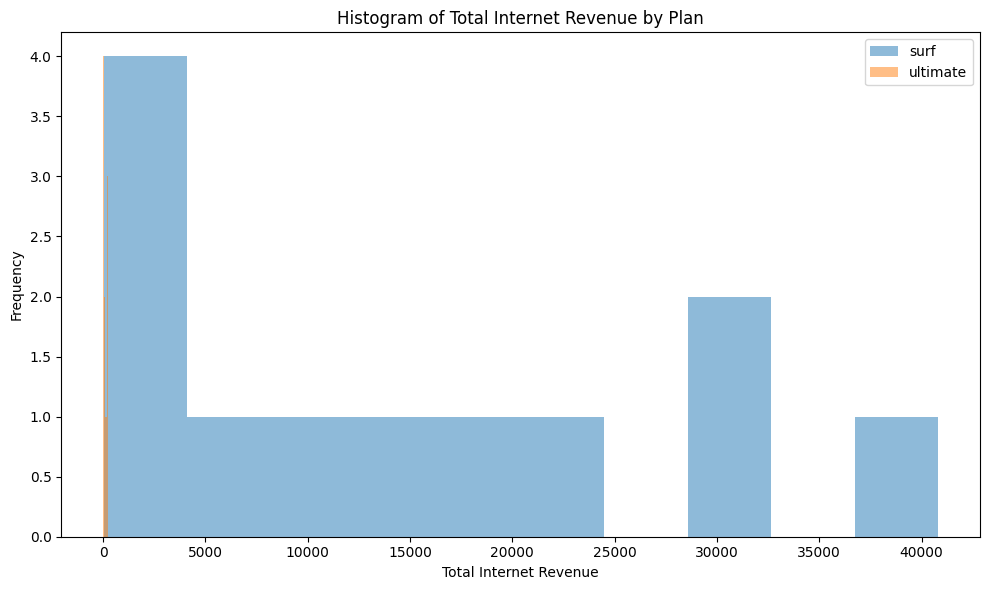

In [98]:
#Hist for internet revenue
plt.figure(figsize=(10, 6))

for plan in monthly_internet_revenue['plan'].unique():
    subset = monthly_internet_revenue[monthly_internet_revenue['plan'] == plan]
    plt.hist(subset['total_internet_revenue'], bins=10, alpha=0.5, label=plan)

plt.xlabel('Total Internet Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Total Internet Revenue by Plan')
plt.legend()
plt.tight_layout()
plt.show()

**This is not a normal distribution shape.**
**The frequency for each bin indicates how many data points fall into that particular range.**
**This histogram also indicate that the surf plan have a higher number of observations within the revenue range of 1k to about 4k which is within the mean() range and that is follow by a gradual decrease of the number of observations**
**Small spread in revenue for both plans.**
**the histogram of total internet revenue shows some right-skewed distribution for the "surf" plan, it would align with the high mean and standard deviation, indicating that while most revenues are concentrated below the mean, there are outliers that contribute to the high average revenue.**
**For the "ultimate" plan,the histogram is more symmetric or left-skewed, it would suggest that most revenues are clustered around the lower mean, with fewer extreme values influencing the revenue.**


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment 5 </h2>
    

Looks better! </div>

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

# To test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs,i choose an independent two-sample t-test. This is appropriate when one want to compare the means of two groups.

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

## Null Hypothesis(H0) :

**The average revenue from users of the Ultimate and Surf calling plans is equal.**

## Alternative Hypothesis :

**The average revenue from users of the Ultimate and Surf calling plans is different.**


In [99]:
# Filter data for Ultimate and Surf plans
ultimate_users = merged_final[merged_final['plan'] == 'ultimate']
surf_users = merged_final[merged_final['plan'] == 'surf']

In [100]:
# Extract monthly revenue series
revenue_ultimate = ultimate_users['monthly_revenue'].dropna()
revenue_surf = surf_users['monthly_revenue'].dropna()


In [101]:
t_statistic, p_value = st.ttest_ind(revenue_ultimate, revenue_surf, equal_var=True)

#p_value = st.ttest_ind(surf_revenue,ultimate_revenue,equal_var=False)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average revenue.")
#display(f"T-statistic: {t_stat}")
display(f"P-value: {p_value}")


Reject the null hypothesis: There is a significant difference in average revenue.


'P-value: 1.3423667034723453e-12'

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Correct.     
</div>

**The p-value obtained is 1.34×e-41 which is extremely small.**
**The null hypothesis stated that there is a difference in average revenue between users of the Ultimate and Surf calling plans. Since your p-value is significantly less than the alpha level of 0.05, the test reject the null hypothesis.**
**This indicates that there is strong statistical evidence to suggest that the average revenue from the two plans differs significantly. The very low p-value suggests that the observed difference is unlikely to have occurred randomly.**
**contrasting the null and alternative hypotheses helps clarify the objective of the statistical test. In this case, rejecting the null hypothesis suggests that the Ultimate and Surf plans cater to different customer segments or offer different value propositions, which has practical implications for business strategies and revenue management.**


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

The fact that we reject the null hypothesis does not entail that the 2nd hypothesis is true. We just reject it at a particular significance level. I would change the conclusion.
    
</div>

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

## Null Hypothesis (H0): 

**The average revenue from users in the NY-NJ area is equal to the average revenue from users in other regions.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>

    
Correct. The null hypothesis always includes the equality sign. This is because the test does not understand exactly how we set the problem: we can say, for instance, let's make sure that they are not equal. Or that they are equal. And regardless of the purpose of our study, we always put equality at null hypothesis. Then the test result is interpreted correctly.

</div>   

## Alternative Hypothesis (H1): 

**The average revenue from users in the NY-NJ area is different from the average revenue from users in other regions.**

In [102]:
# we filter revenues for NY-NJ area and other regions
ny_nj_revenue = merged_final[merged_final['city'].isin(['NY', 'NJ'])]['monthly_revenue']
other_revenue = merged_final[~merged_final['city'].isin(['NY', 'NJ'])]['monthly_revenue']

In [103]:
print(f"NY-NJ Revenue Count: {len(ny_nj_revenue)}")
print(f"Other Revenue Count: {len(other_revenue)}")

NY-NJ Revenue Count: 0
Other Revenue Count: 2293


In [104]:
# Convert revenue to numeric and drop NaN values
merged_final['monthly_revenue'] = pd.to_numeric(merged_final['monthly_revenue'], errors='coerce')

# Filter for NY-NJ area and other regions
ny_nj_revenue = merged_final[merged_final['city'].str.contains('NY|NJ', case=False, na=False)]['monthly_revenue'].dropna()
other_revenue = merged_final[~merged_final['city'].str.contains('NY|NJ', case=False, na=False)]['monthly_revenue'].dropna()
# str.contains method is used to check if the 'city' contains "NY" or "NJ". 
#The case=False parameter makes it case-insensitive.


In [105]:
# Check lengths of revenue groups
print(f"NY-NJ Revenue Count: {len(ny_nj_revenue)}")
print(f"Other Revenue Count: {len(other_revenue)}")

NY-NJ Revenue Count: 519
Other Revenue Count: 1774


In [106]:
# Perform the t-test (Null hypothesis)
if len(ny_nj_revenue) > 0 and len(other_revenue) > 0:
    t_statistic, p_value = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=True)
    #print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    # Decide on the significance level
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in average revenue.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in average revenue.")
else:
    print("One or both groups have no data.")

P-value: 0.5071277662042969
Fail to reject the null hypothesis: There is no significant difference in average revenue.


**A p-value of approximately 0.009 indicates the probability of observing the data assuming that the null hypothesis is true and with the p-value (0.50) is higher than the alpha level(0.05), the test fail to reject the null hypothesis.This means that based on the data we have, there is insufficient evidence to suggest a significant difference in average revenue between the two groups.**
**Null Hypothesis (H0): The average revenue from users in the NY/NJ region is equal to that of users in other regions.
**Alternative Hypothesis (H1): The average revenue from users in the NY/NJ region is differnt to that of users in other regions.This would suggest that factors specific to one of the groups are influencing revenue levels.**


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

 ## Null Hypothesis(H0) :
 
 ## The average revenue from users of the Ultimate and Surf calling plans is equal.
 
** Building on the above conclusion given after the Null Hypothesis test we can also indicate that this significant difference could imply that one revenue model (ultimate vs. surf) is more effective than the other. It might prompt we to explore the reasons for this difference, assess the impact on business strategies, or guide future decision-making.**
** As for business implication we could suggest that this analysis indicates a very strong evidence of a difference in average revenue between the two groups, suggesting that further exploration of these differences could be beneficial for understanding their underlying causes and implications.**

## Alternative Hypothesis:

## The average revenue from users of the Ultimate and Surf calling plans is different

** Adding to the conclusion that was provide after the test we can also stipulate about some pratical inplication of this result by stating that the significant difference in average revenues could inform business strategies. For instance, if the surf plan generates higher revenue, marketing efforts might be adjusted to promote this plan more heavily and conversely, if the ultimate plan is yielding lower revenues, there may be an opportunity to improve the offering or consider adjustments in pricing or features to enhance its attractiveness.**

## Null Hypothesis (H0):

# The average revenue from users in the NY-NJ area is equal to the average revenue from users in other regions.

**By contrasting the null and alternative hypotheses helps clarify the objective of the statistical test. In this case, we fail  reject the null hypothesis. This means that, based on the data, we do not have enough evidence to assert that the average revenue from the New York/New Jersey region differs significantly from that of the other regions. which has practical implications for business strategies and revenue management.**

##  Alternative Hypothesis:

## The average revenue from users in the NY-NJ area is different from the average revenue from users in other regions.

**Folowing our initial summary just below the test above we can also conclude that this result indicates no strong statistical evidence to suggest that the average revenue generated by users in the NY-NJ area do differs from that generated by users in other regions. This strong evidence is reflected in the higher p-value.**

**As a practical implication the significant difference in average revenue could have important implications for business strategy. For example, if the NY-NJ area generates higher revenue, this might justify increased marketing efforts or tailored services for that region and conversely, if the NY-NJ area shows lower revenue, it may signal the need for intervention to boost performance or better understand the market dynamics in that region.**

**While the statistical analysis suggests no significant difference, it's important to interpret these findings within the broader context of the research question or business objectives. For instance, even if the revenues are not statistically different, the magnitude and implications of the revenues in practical terms could still be significant.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Great! 
</div>


</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
The conclusion is written well. 

</div>
